<a href="https://colab.research.google.com/github/listyaaa/UTS-Machine-Learning/blob/main/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nissa Listya Putri (4112322006)

**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import joblib
import warnings
warnings.filterwarnings("ignore")


**Load dan Ekplorasi Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/tugas machine learning/data_training.csv')
print(df.head())

print("\nInfo Dataset:")
df.info()

print("\nDistribusi Target:")
print(df['quality'].value_counts())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0      9.8        5  1366  
1      9.2        5   103  
2 

**Visualisasi Data**

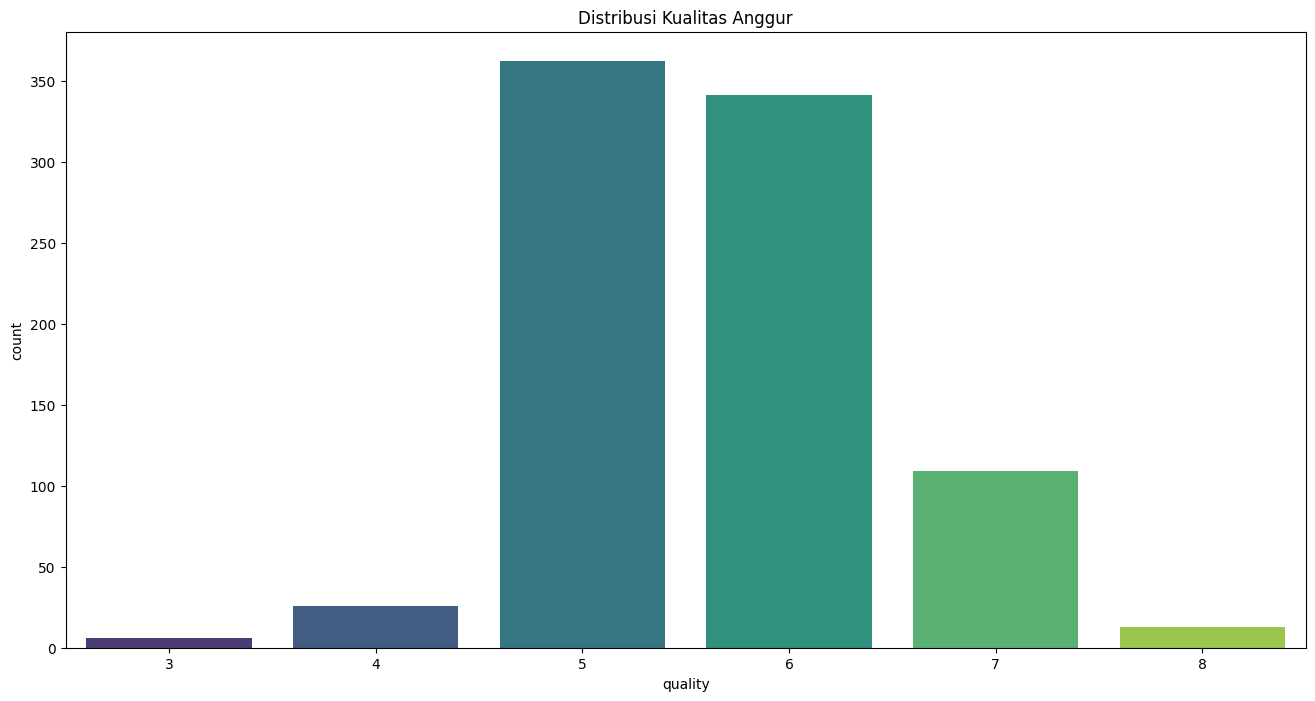

<Figure size 2000x1000 with 0 Axes>

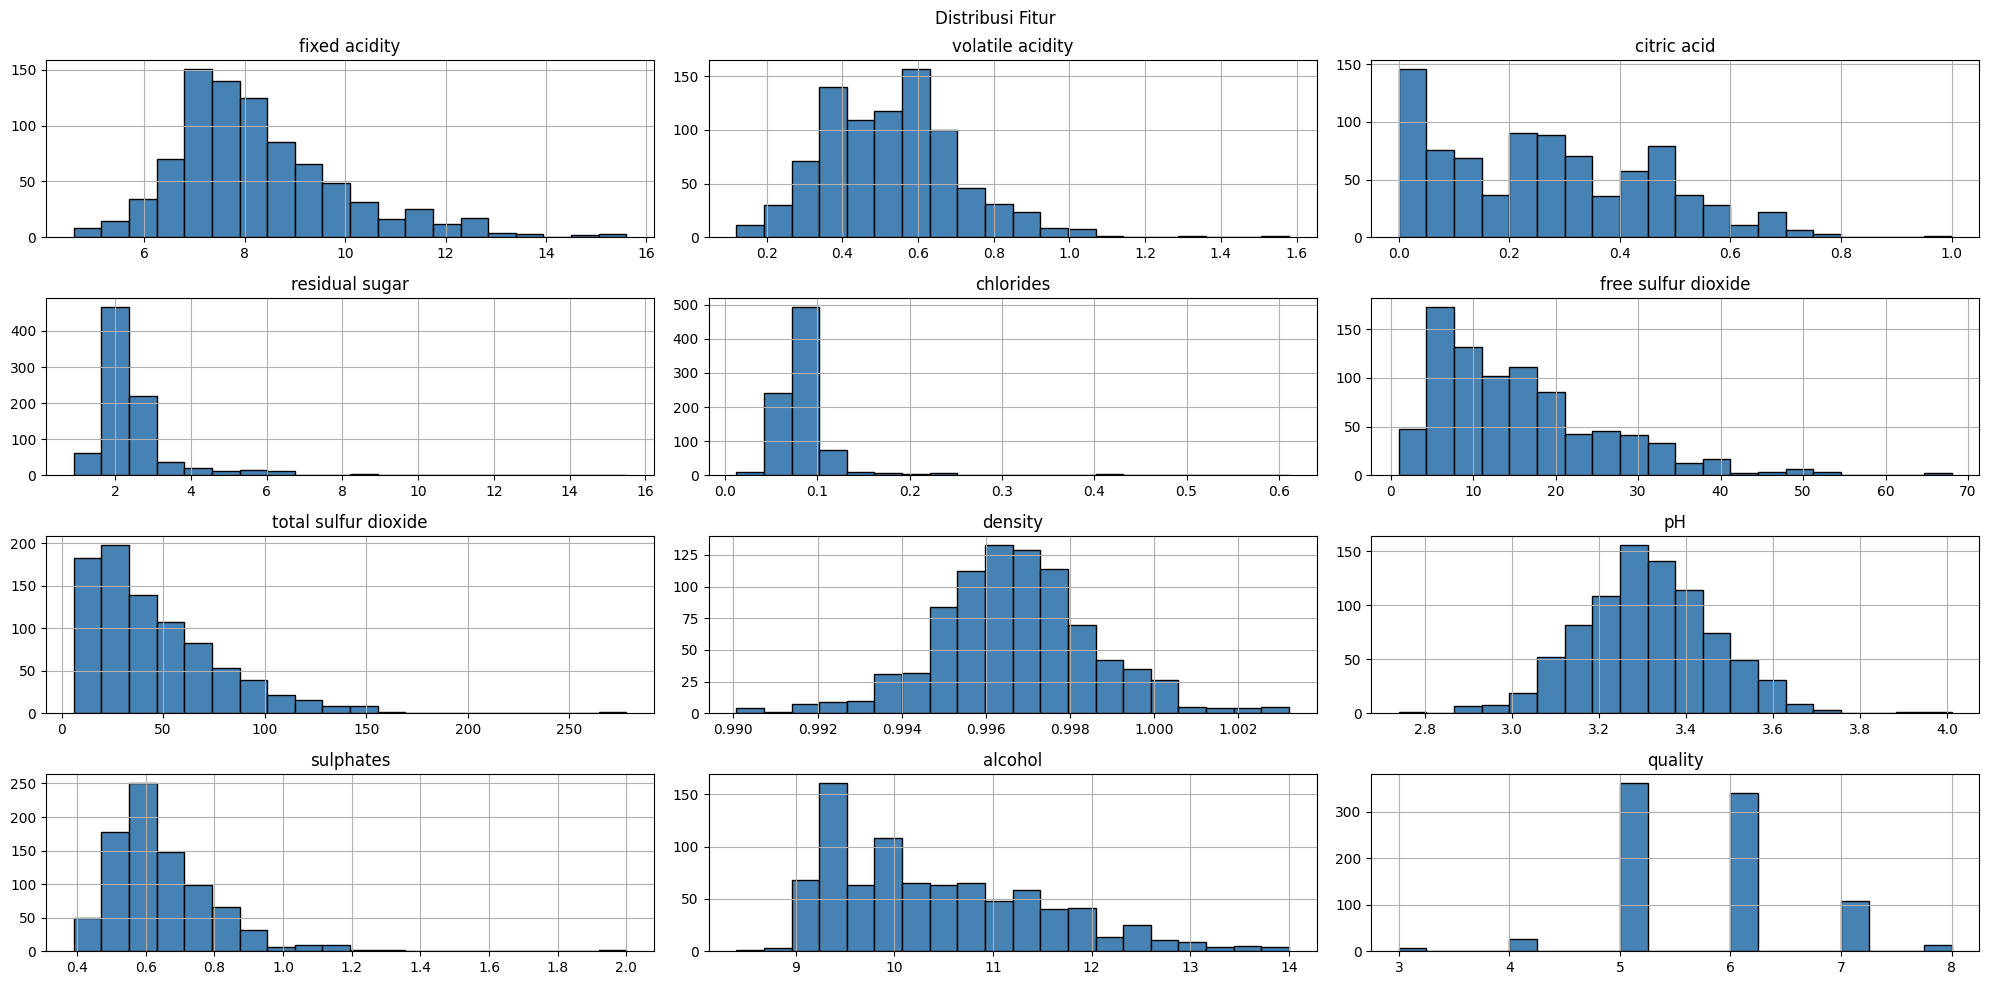

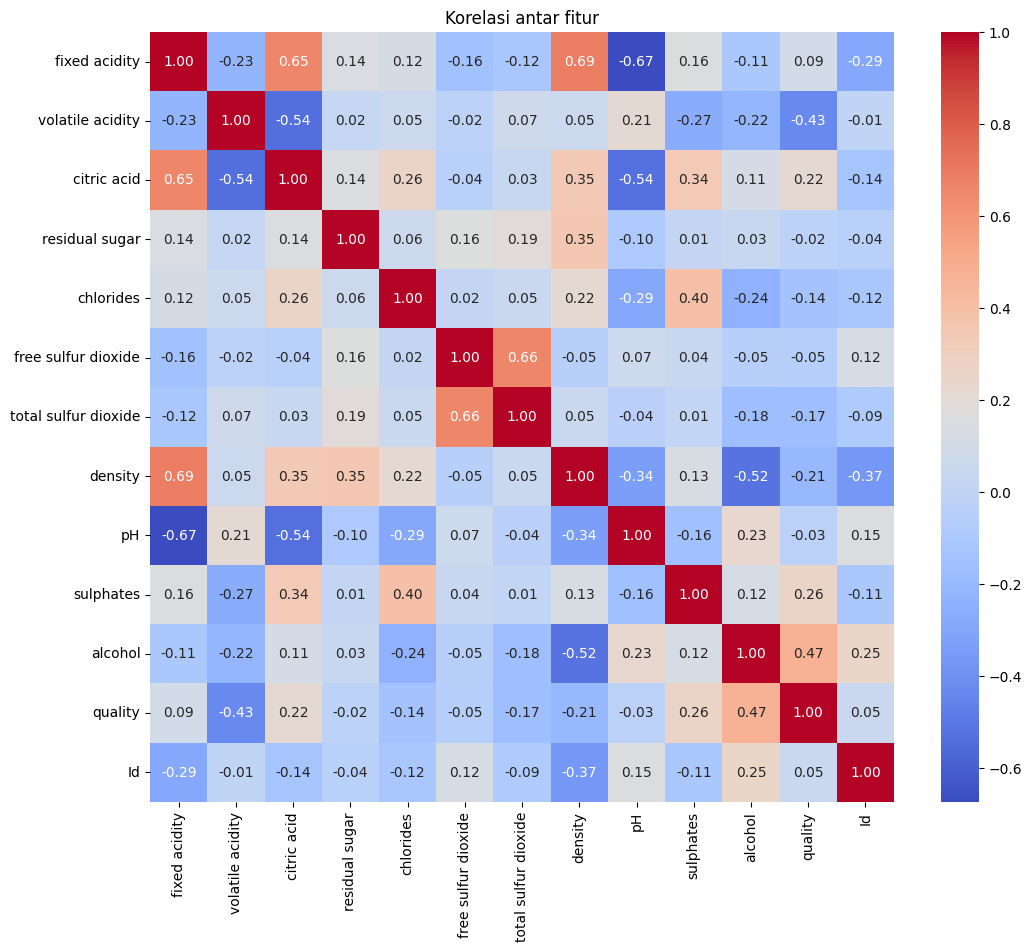

In [3]:
plt.figure(figsize=(16, 8))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title("Distribusi Kualitas Anggur")
plt.show()

plt.figure(figsize=(20, 10))
df.drop(columns=["Id"]).hist(bins=20, figsize=(20, 10), color="steelblue", edgecolor='black')
plt.suptitle("Distribusi Fitur")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar fitur")
plt.show()


Diagram batang tersebut menunjukkan distribusi kelas kualitas anggur dalam dataset pelatihan. Terlihat bahwa data tidak terdistribusi secara merata pada setiap kelas. Kelas dengan nilai kualitas 5 dan 6 mendominasi dataset. Sementara itu, kelas dengan nilai kualitas 3, 4, dan 8 memiliki jumlah data yang jauh lebih sedikit, bahkan kurang dari 50 data. Hal ini menandakan bahwa dataset bersifat tidak seimbang (imbalanced), yang berpotensi membuat model pembelajaran mesin bias terhadap kelas mayoritas. Dalam kondisi seperti ini, model cenderung lebih sering memprediksi kelas 5 dan 6 karena jumlah sampelnya lebih banyak, sedangkan performa pada kelas minoritas dapat menurun karena kurangnya data untuk belajar dari pola-pola yang relevan. Ketidakseimbangan ini perlu ditangani dengan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique), agar model dapat belajar secara adil dan menghasilkan prediksi yang lebih akurat dan seimbang untuk semua kelas kualitas anggur.

**Preprocessing Data**

In [4]:
X = df.drop(columns=["quality", "Id"])
y = df["quality"]

print("Distribusi sebelum SMOTE:", Counter(y))

# SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribusi setelah SMOTE:", Counter(y_resampled))

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


Distribusi sebelum SMOTE: Counter({5: 362, 6: 341, 7: 109, 4: 26, 8: 13, 3: 6})
Distribusi setelah SMOTE: Counter({5: 362, 7: 362, 6: 362, 4: 362, 8: 362, 3: 362})


**Pelatihan Model**

Random Forest Accuracy: 0.8575
Logistic Regression Accuracy: 0.6460
SVM Accuracy: 0.7747
Decision Tree Accuracy: 0.7632
KNN Accuracy: 0.7747
Gradient Boosting Accuracy: 0.8276


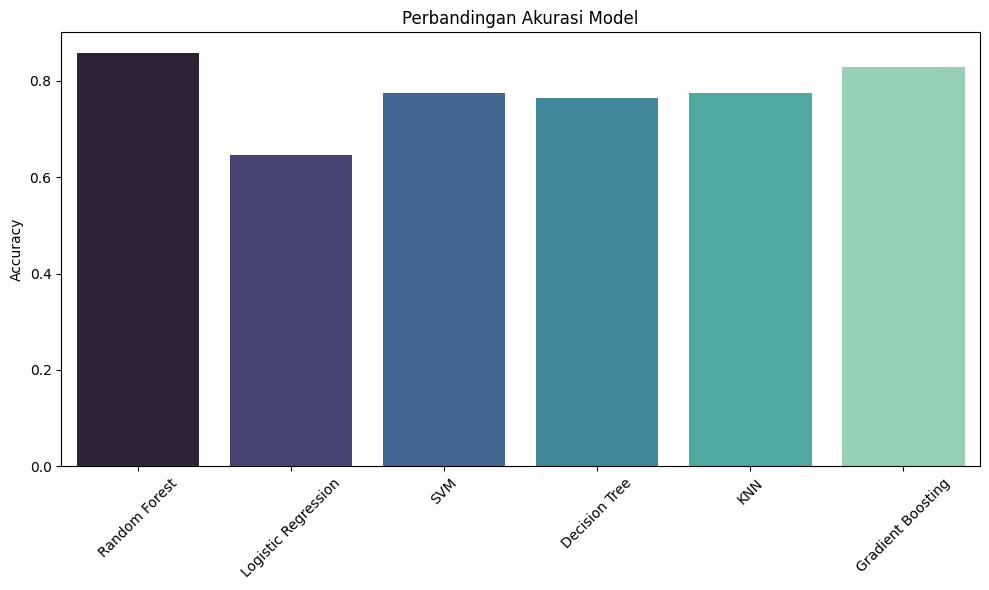

In [5]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=300),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="mako")
plt.ylabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dari hasil pengujian, model Random Forest memberikan hasil terbaik dengan akurasi 86,21%, artinya model ini paling tepat dalam memprediksi kualitas anggur. Di posisi kedua ada model Gradient Boosting dengan akurasi 82,53%, yang juga menunjukkan performa yang baik. Model SVM, Decision Tree, dan KNN memiliki akurasi yang mirip, sekitar 77%, cukup bagus tapi belum sebaik Random Forest. Sementara itu, model Logistic Regression memiliki akurasi paling rendah, yaitu 64,60%, yang berarti model ini kurang cocok digunakan untuk kasus ini karena kurang mampu menangkap pola data dengan baik.

**Evaluasi Model Terbaik**

Classification Report (Random Forest):
              precision    recall  f1-score   support

           3       0.96      1.00      0.98        76
           4       0.91      0.99      0.95        70
           5       0.74      0.73      0.74        63
           6       0.65      0.57      0.60        74
           7       0.87      0.82      0.84        88
           8       0.91      1.00      0.96        64

    accuracy                           0.85       435
   macro avg       0.84      0.85      0.84       435
weighted avg       0.84      0.85      0.84       435



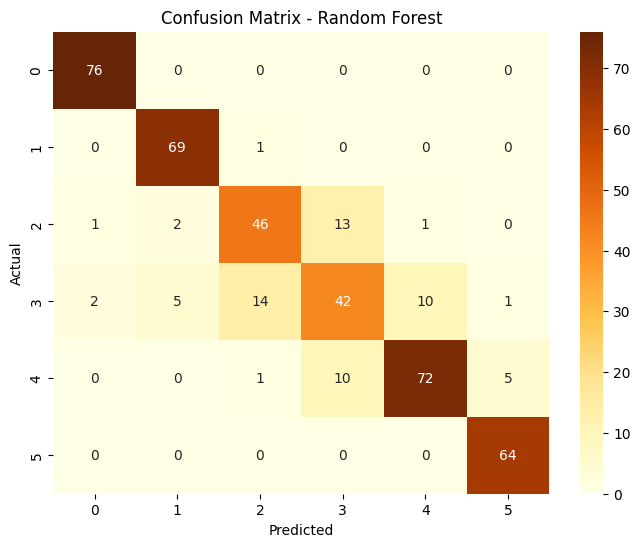

In [6]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_val)

print("Classification Report (Random Forest):")
print(classification_report(y_val, y_pred_rf))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, cmap="YlOrBr", fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Hasil confusion matrix dari model Random Forest menunjukkan bahwa model mampu mengklasifikasikan sebagian besar data dengan akurasi tinggi, yaitu 86,21%. Model bekerja sangat baik pada kelas 3, 4, dan 8, dengan nilai precision dan recall mendekati atau sama dengan 1.0 (artinya prediksinya sangat tepat). Namun, performa model masih kurang pada kelas 5 dan 6, terutama kelas 6 yang memiliki recall hanya 0.57, menunjukkan masih banyak data kelas 6 yang salah diklasifikasikan. Secara keseluruhan, model cukup stabil dan memberikan performa baik pada sebagian besar kelas.

**Tuning Hyperparameter (GridSearchCV)**

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Akurasi setelah tuning: 0.8597701149425288
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


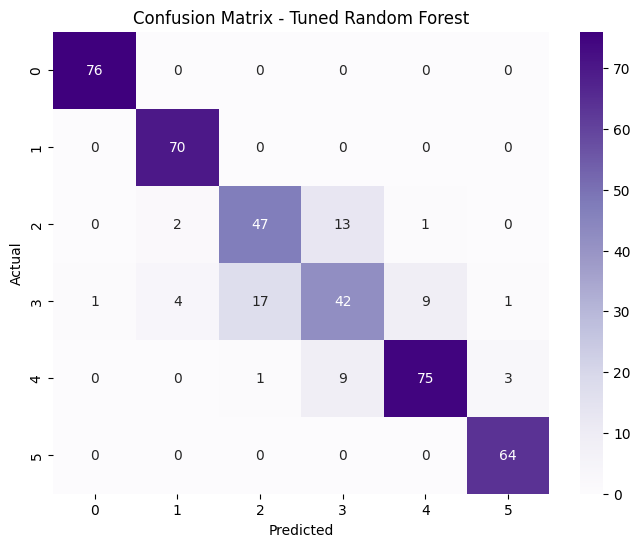

In [7]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluasi setelah tuning
y_pred_best = best_rf.predict(X_val)
print("\nAkurasi setelah tuning:", accuracy_score(y_val, y_pred_best))
print("Best Parameters:", grid_search.best_params_)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_pred_best), annot=True, cmap="Purples", fmt='d')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Hasil tuning menunjukkan bahwa setelah dilakukan pencarian parameter terbaik menggunakan GridSearchCV dengan 48 kombinasi parameter dan 3 kali validasi silang (cross-validation), diperoleh akurasi sebesar 85,97%. Meskipun sudah ditemukan kombinasi parameter terbaik seperti n_estimators=150, max_depth=20, dan bootstrap=False, akurasi justru sedikit menurun dari sebelumnya, yaitu dari 86,21% menjadi 85,97%.

Penurunan kecil ini menunjukkan bahwa tuning tidak selalu menjamin peningkatan performa, apalagi jika model awal sudah cukup optimal. Bisa jadi model awal sudah menemukan konfigurasi yang secara alami cocok dengan data, atau tuning justru mengarahkan model menjadi sedikit overfitting pada data latih. Namun demikian, hasil tuning tetap berguna untuk memahami batas performa model dan menemukan parameter yang paling stabil di berbagai kondisi.

**Simpan Model**

In [8]:
joblib.dump(best_rf, 'model_final.pkl')
joblib.dump(scaler, 'scaler_final.pkl')


['scaler_final.pkl']

**Prediksi Data Testing**

In [9]:
df_test = pd.read_csv('/content/drive/MyDrive/tugas machine learning/data_testing.csv')
X_test = df_test.drop(columns=["Id"])
X_test_scaled = scaler.transform(X_test)

y_pred_test = best_rf.predict(X_test_scaled)

# Simpan hasil prediksi
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'quality': y_pred_test
})

submission.to_csv('hasilprediksi_006.csv', index=False)
print("File prediksi disimpan sebagai 'hasilprediksi_006.csv'")
print(submission.head())


File prediksi disimpan sebagai 'hasilprediksi_006.csv'
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        6
